<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/YB0404(2)_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [41]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

print('confusion: \n',confusion_matrix(y,y_pred))

confusion: 
 [[337  20]
 [ 30 182]]


* 정확도

In [42]:
from sklearn.metrics import accuracy_score

print('accuracy: {0:.4f}'.format(accuracy_score(y,y_pred)))

accuracy: 0.9121


* 정밀도

In [43]:
from sklearn.metrics import precision_score

print('precision: {0:.4f}'.format(precision_score(y,y_pred)))

precision: 0.9010


* 재현율

In [44]:
from sklearn.metrics import recall_score

print('recall: : {0:.4f}'.format(recall_score(y,y_pred)))

recall: : 0.8585


* F1 score

In [45]:
from sklearn.metrics import f1_score

print('f1: {0:.4f}'.format(f1_score(y,y_pred)))

f1: 0.8792


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [46]:
from sklearn.preprocessing import Binarizer

pred_proba=model_lor.predict_proba(X)
pred_proba_1=pred_proba[:,0].reshape(-1,1)

binarizer=Binarizer(threshold=0.1).fit(pred_proba_1)
y_predict=binarizer.transform(pred_proba_1)

In [47]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
def get_clf_eval(y_test,pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  f1=f1_score(y_test,pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1 score: {3:.4f}'.format(accuracy,precision,recall,f1))

get_clf_eval(y,y_predict)

오차 행렬
[[  1 356]
 [139  73]]
정확도: 0.1301, 정밀도: 0.1702, 재현율: 0.3443, f1 score: 0.2278


* ROC 곡선 시각화

In [48]:
from sklearn.metrics import roc_curve

pred_proba_1=model_lor.predict_proba(X)[:,1]
fprs,tprs,thresholds=roc_curve(y,pred_proba_1)

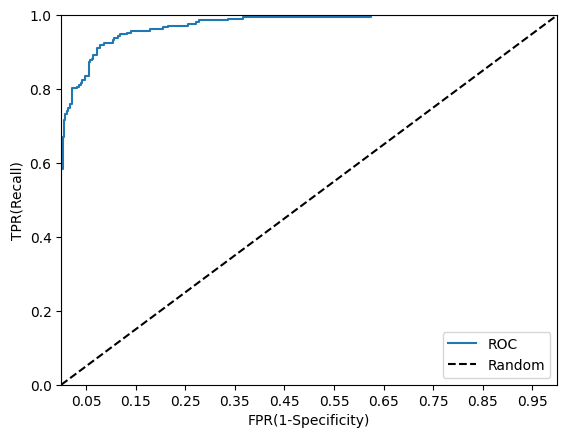

In [49]:
import matplotlib.pyplot as plt
import numpy as np
def roc_curve_plot(y_test,pred_proba_c1):
  # 임곗값에 따른 FPR, TPR 값을 반환받음.
  fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)
  # ROC 곡선을 그래프 곡선으로 그림.
  plt.plot(fprs,tprs,label='ROC')
  # 가운데 대각선 직선을 그림.
  plt.plot([0,1],[0,1],'k--',label='Random')

  # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
  start,end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.xlabel('FPR(1-Specificity)')
  plt.ylabel('TPR(Recall)')
  plt.legend()

roc_curve_plot(y,pred_proba_1)

* ROC AUC 값

In [50]:
from sklearn.metrics import roc_auc_score
pred_proba=model_lor.predict_proba(X)[:,1]
roc_score=roc_auc_score(y,pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9741
